<a href="https://colab.research.google.com/github/advik-7/Agents/blob/main/3_layer_MultiAgent_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cat="/content/Cat.jpeg"
tiger="/content/Tiger.jpeg"
lion="/content/lion.jpeg"
panda="/content/panda.jpeg"

In [14]:
!pip install graphviz

In [15]:
!pip install pygraphviz

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)


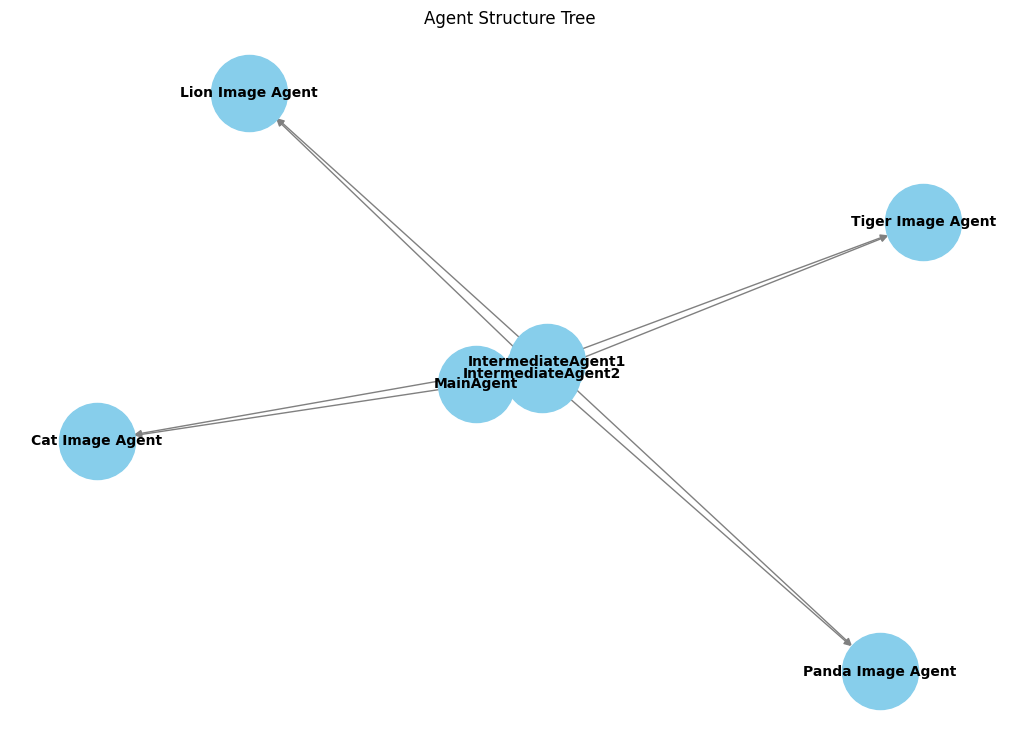

Animal Image Display System

Please type the animal you want to see (e.g., cat, tiger, lion, panda):
> cat

Processing input...


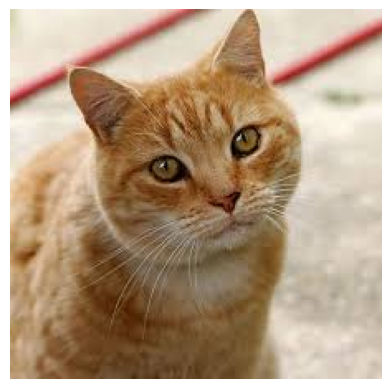

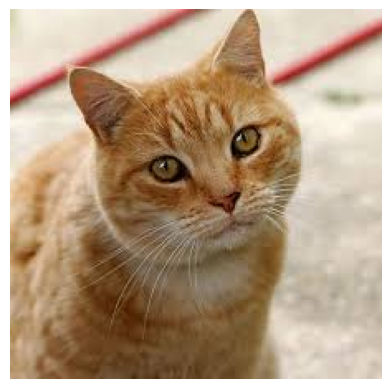


--- Final Results ---
IntermediateAgent1: Displaying Cat Image
IntermediateAgent2: Displaying Cat Image


In [11]:
from langchain_core.tools import tool
import matplotlib.pyplot as plt
from transformers import pipeline
from PIL import Image
import networkx as nx

@tool
def display_cat_image(tool_input: str) -> str:
    """
    Displays the cat image using matplotlib in a Colab environment.
    """
    cat_path = "/content/Cat.jpeg"
    img = Image.open(cat_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Cat Image"

@tool
def display_tiger_image(tool_input: str) -> str:
    """
    Displays the tiger image using matplotlib in a Colab environment.
    """
    tiger_path = "/content/Tiger.jpeg"
    img = Image.open(tiger_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Tiger Image"

@tool
def display_lion_image(tool_input: str) -> str:
    """
    Displays the lion image using matplotlib in a Colab environment.
    """
    lion_path = "/content/lion.jpeg"
    img = Image.open(lion_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Lion Image"

@tool
def display_panda_image(tool_input: str) -> str:
    """
    Displays the panda image using matplotlib in a Colab environment.
    """
    panda_path = "/content/panda.jpeg"
    img = Image.open(panda_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Panda Image"

def decide_task(input_text: str) -> str:
    """
    Decides which image to display based on the input text using a zero-shot classification model.

    Args:
        input_text (str): The input text specifying the animal to display.

    Returns:
        str: The name of the image to display (cat, tiger, lion, or panda).
    """
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    candidate_labels = ["cat", "tiger", "lion", "panda"]
    classification_results = classifier(input_text, candidate_labels=candidate_labels)
    top_task = classification_results["labels"][0]
    return top_task

class RootAgent:
    """
    Root agent responsible for executing the display function for an image.

    Attributes:
        name (str): The name of the root agent.
        display_function (function): The function responsible for displaying an image.
    """
    def __init__(self, name, display_function):
        self.name = name
        self.display_function = display_function

    def execute_task(self):
        result = self.display_function("")
        return result

class IntermediateAgent:
    """
    Intermediate agent responsible for deciding which root agent to use and executing the task.

    Attributes:
        agents_map (dict): A map of task labels to root agents.
    """
    def __init__(self, agents_map):
        self.agents_map = agents_map

    def decide_and_execute(self, input_text: str):
        predicted_task = decide_task(input_text)
        chosen_agent = self.agents_map[predicted_task]
        return chosen_agent.execute_task()

class MainAgent:
    """
    Main agent responsible for distributing tasks to multiple intermediate agents.

    Attributes:
        intermediate_agents (list): A list of intermediate agents.
    """
    def __init__(self, intermediate_agents):
        self.intermediate_agents = intermediate_agents

    def distribute_tasks(self, input_text: str):
        results = {}
        for idx, agent in enumerate(self.intermediate_agents, start=1):
            results[f"IntermediateAgent{idx}"] = agent.decide_and_execute(input_text)
        return results

def create_agent_tree():
    G = nx.DiGraph()

    cat_agent = RootAgent("Cat Image Agent", display_cat_image)
    tiger_agent = RootAgent("Tiger Image Agent", display_tiger_image)
    lion_agent = RootAgent("Lion Image Agent", display_lion_image)
    panda_agent = RootAgent("Panda Image Agent", display_panda_image)

    agents_map1 = {"cat": cat_agent, "tiger": tiger_agent, "lion": lion_agent, "panda": panda_agent}
    agents_map2 = {"cat": cat_agent, "tiger": tiger_agent, "lion": lion_agent, "panda": panda_agent}

    intermediate_agent1 = IntermediateAgent(agents_map1)
    intermediate_agent2 = IntermediateAgent(agents_map2)

    main_agent = MainAgent([intermediate_agent1, intermediate_agent2])

    G.add_node("MainAgent")
    G.add_node("IntermediateAgent1")
    G.add_node("IntermediateAgent2")
    G.add_node("Cat Image Agent")
    G.add_node("Tiger Image Agent")
    G.add_node("Lion Image Agent")
    G.add_node("Panda Image Agent")

    # Add edges
    G.add_edge("MainAgent", "IntermediateAgent1")
    G.add_edge("MainAgent", "IntermediateAgent2")
    G.add_edge("IntermediateAgent1", "Cat Image Agent")
    G.add_edge("IntermediateAgent1", "Tiger Image Agent")
    G.add_edge("IntermediateAgent1", "Lion Image Agent")
    G.add_edge("IntermediateAgent1", "Panda Image Agent")
    G.add_edge("IntermediateAgent2", "Cat Image Agent")
    G.add_edge("IntermediateAgent2", "Tiger Image Agent")
    G.add_edge("IntermediateAgent2", "Lion Image Agent")
    G.add_edge("IntermediateAgent2", "Panda Image Agent")

    return G

def visualize_agent_tree():
    G = create_agent_tree()

    # Use spring_layout for a more tree-like representation
    pos = nx.spring_layout(G, seed=42)  # Set seed for reproducibility

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
    plt.title("Agent Structure Tree")
    plt.show()

if __name__ == "__main__":
    visualize_agent_tree()

    cat_agent = RootAgent("Cat Image Agent", display_cat_image)
    tiger_agent = RootAgent("Tiger Image Agent", display_tiger_image)
    lion_agent = RootAgent("Lion Image Agent", display_lion_image)
    panda_agent = RootAgent("Panda Image Agent", display_panda_image)

    agents_map1 = {"cat": cat_agent, "tiger": tiger_agent, "lion": lion_agent, "panda": panda_agent}
    agents_map2 = {"cat": cat_agent, "tiger": tiger_agent, "lion": lion_agent, "panda": panda_agent}

    intermediate_agent1 = IntermediateAgent(agents_map1)
    intermediate_agent2 = IntermediateAgent(agents_map2)

    main_agent = MainAgent([intermediate_agent1, intermediate_agent2])

    print("Animal Image Display System\n")
    print("Please type the animal you want to see (e.g., cat, tiger, lion, panda):")
    animal_input = input("> ")
    print("\nProcessing input...")

    results = main_agent.distribute_tasks(animal_input)

    print("\n--- Final Results ---")
    for task, result in results.items():
        print(f"{task}: {result}")
